In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
featurizer = malaya_speech.featurization.STTFeaturizer()

In [5]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [6]:
y = featurizer(x)
y.shape

(564, 80)

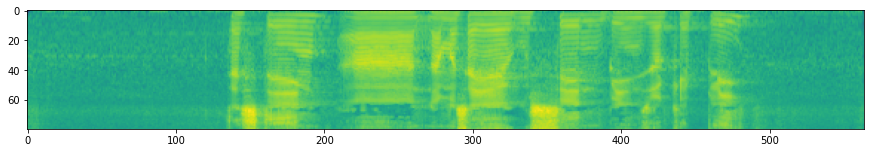

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y.T)

CPU times: user 37.4 ms, sys: 2.64 ms, total: 40.1 ms
Wall time: 39 ms


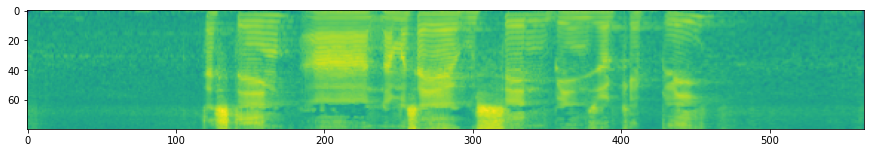

In [34]:
%%time

warped = malaya_speech.augmentation.spectrogram.warp_time_interpolate(y)
plt.figure(figsize = (15, 5))
plt.imshow(warped.T)

CPU times: user 19.5 ms, sys: 2.2 ms, total: 21.7 ms
Wall time: 20.1 ms


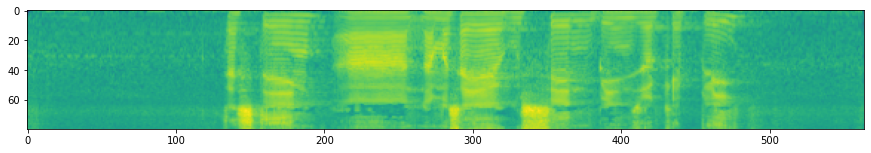

In [33]:
%%time

warped = malaya_speech.augmentation.spectrogram.warp_time_pil(y)
plt.figure(figsize = (15, 5))
plt.imshow(warped.T)

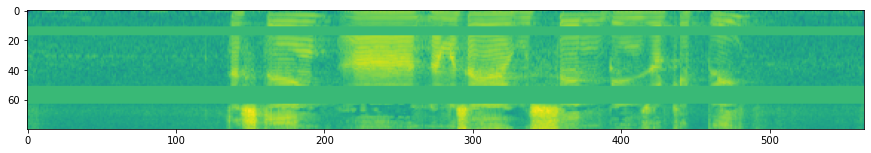

In [17]:
y_ = malaya_speech.augmentation.spectrogram.mask_frequency(y, n_freq_mask = 2, 
                                                           width_freq_mask = 15)

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

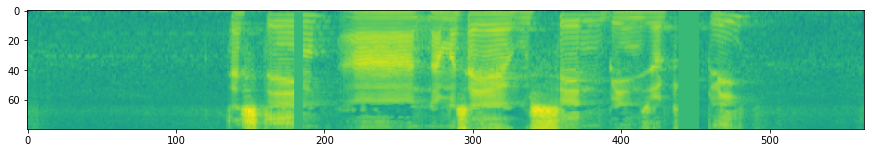

In [18]:
y_ = malaya_speech.augmentation.spectrogram.mask_time(y, n_time_mask = 2, 
                                                      width_time_mask = int(y.shape[0] * 0.05))

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)